In [2]:
from sklearn import tree
from nltk.corpus import stopwords
import spacy
import pandas as pd
import numpy as np
import graphviz 
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display

ModuleNotFoundError: No module named 'graphviz'

load data

In [3]:
df = pd.read_csv("./twitter_data/exploration_dataset.csv")

load models and stopwords

In [3]:
nlp = spacy.load("en_core_web_sm")
vectorizer = CountVectorizer()
stop_words = set(stopwords.words('english')) 

Corpus lemmatization

In [4]:
corpus = []
Y = np.zeros(len(df['id']), dtype=int)
for idx, row in df.iterrows():
    doc = nlp(row['text']) # spacy sintactic parsing
    filtered_sentence = [t.lemma_ for t in doc if not t.lemma_ in stop_words] 
    corpus.append(" ".join(filtered_sentence))
    if row['label'] != 'none':
        Y[idx] = 1
print(corpus)

hate kat & amp ; andre much la …', 'seriously believe Kat & amp', 'RT @bronny25 : Kat&amp;Andre Monday : " People vote strategically , rude ! ! " Kat&amp;Andre tonight : vote strategically third time …', '& amp ; blonde score fairly " @K8ie_Mac : devastate Kat still , big fan blonde like -PRON- Kat # MKR "', 'OMG!A friggin 1!what the?wow ! 2 u r disgraceful absolutely shred good sportsmanship redeemable quality ! 👎 😤 😤 😤 😡 👹 🙌 # mkr', 'sleep come across 😂 😂 😂 😂 # mkr # mykitchenrule # thegoblin # mkr2015 https://t.co/whc8x5hlkx', 'oh Colin .... calm -PRON- beat heart 😍 😍 😍 # mkr', '# MKR ’ rubbish . fuck . even want tune tomorrow night . \n Kat Andre go home . Mongrel hypocrite .', '@TheOnlyAnimal93 -PRON- Eva Debra -PRON- seem lovely 😊 # mkr', 'RT @scheherazadem : Kat & amp', 'HECK ! ! ! Kat Andre definitely deserve say # mkr ! ! angry right 😡', 'RT @suzannecarbone : " @womensweeklymag : update : @healthgovau launch investigation MKR chef Pete Evans Paleo cookbook kid http://t . …', '

transform corpus to word vector (one hot coding)

In [5]:
X = vectorizer.fit_transform(corpus)
print(X)

(0, 5552)	2
  (0, 4500)	1
  (0, 6806)	1
  (0, 1194)	1
  (0, 3164)	1
  (0, 14959)	1
  (0, 722)	1
  (0, 14548)	1
  (0, 8799)	1
  (1, 8799)	1
  (1, 4085)	1
  (1, 10602)	2
  (1, 3104)	1
  (1, 5904)	1
  (1, 1758)	1
  (1, 6418)	1
  (2, 8799)	1
  (2, 4085)	1
  (2, 10602)	2
  (2, 3104)	1
  (2, 5904)	1
  (2, 1758)	1
  (2, 6418)	1
  (3, 8799)	1
  (3, 4085)	1
  :	:
  (10771, 2796)	1
  (10771, 7831)	1
  (10771, 4872)	1
  (10771, 13173)	1
  (10771, 9099)	1
  (10772, 10602)	3
  (10772, 6241)	1
  (10772, 2201)	1
  (10772, 9651)	1
  (10772, 1345)	1
  (10772, 5371)	1
  (10772, 6860)	1
  (10773, 6626)	1
  (10773, 3454)	1
  (10774, 1657)	1
  (10775, 10602)	2
  (10775, 5501)	1
  (10775, 7579)	1
  (10775, 9252)	1
  (10775, 4583)	1
  (10775, 11717)	1
  (10776, 10602)	1
  (10776, 5620)	1
  (10776, 7831)	1
  (10776, 9933)	1


Create and fit tree

In [6]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10)
clf = clf.fit(X, Y)

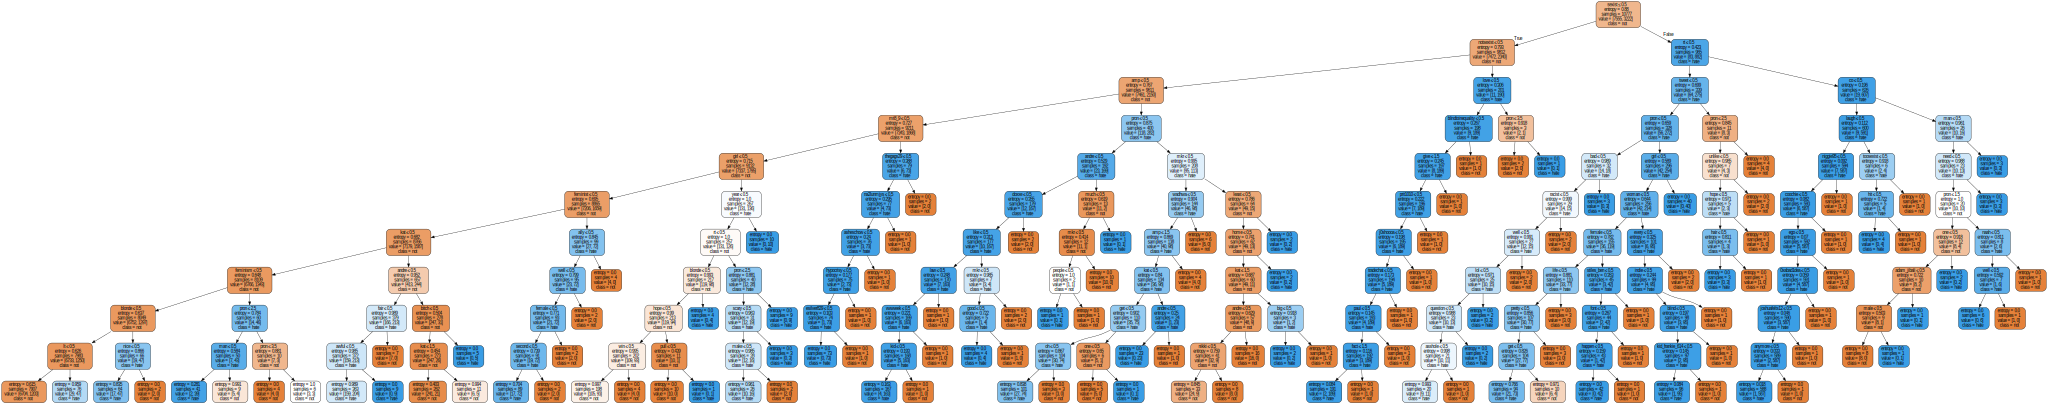

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None,
    class_names=['not','hate'],
    feature_names=vectorizer.get_feature_names(),
    filled=True, rounded=True,  special_characters=True) 

graph = graphviz.Source(dot_data) 
graph.render("./twitter_data/tree") 

display(graphviz.Source(dot_data))

In [7]:
a = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [8]:
a.head()

,00,000,00simmerforlife,01,02,02jbywfj2f,05,06apcfgdf0,0cclus,0idinjglje,...,zvw6lcpgyk,zwstmbhno4,zy3chiaq7f,zy5d95bk6e,zy9bc5kjdz,zydzshc4ql,zyhosbrfff,zynga,zython86,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
a.to_csv("./twitter_data/word_vector.csv")